In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('E:/DSML_Projects/LogisticRegression/logistic_regression.csv')

loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

term : The number of payments on the loan. Values are in months and can be either 36 or 60.

int_rate : Interest Rate on the loan

installment : The monthly payment owed by the borrower if the loan originates.

grade : LoanTap assigned loan grade

sub_grade : LoanTap assigned loan subgrade

emp_title :The job title supplied by the Borrower when applying for the loan.

emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.

annual_inc : The self-reported annual income provided by the borrower during registration.

verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified

issue_d : The month which the loan was funded

loan_status : Current status of the loan - Target Variable

purpose : A category provided by the borrower for the loan request.

title : The loan title provided by the borrower

dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.

earliest_cr_line :The month the borrower's earliest reported credit line was opened

open_acc : The number of open credit lines in the borrower's credit file.

pub_rec : Number of derogatory public records

revol_bal : Total credit revolving balance

revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

total_acc : The total number of credit lines currently in the borrower's credit file

initial_list_status : The initial listing status of the loan. Possible values are – W, F

application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers

mort_acc : Number of mortgage accounts.

pub_rec_bankruptcies : Number of public record bankruptcies

Address: Address of the individual

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
df.shape

(396030, 27)

* This dataset has 396030 rows and 27 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

* Here loan_amnt, int_rate,installment,annual_inc, dti, pub_rec, revol_bal, revol_util,total_acc,mort_acc, pub_rec_bankruptcies has Float values 
* Remaining all other columns has Object data type
 

In [6]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [7]:
df.describe(exclude=np.number).T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


* By using I can find unique values for each categorical column

# EDA and Feature Engineering

In [8]:
df['address'] = df['address'].apply(lambda x : x[-8:-6])

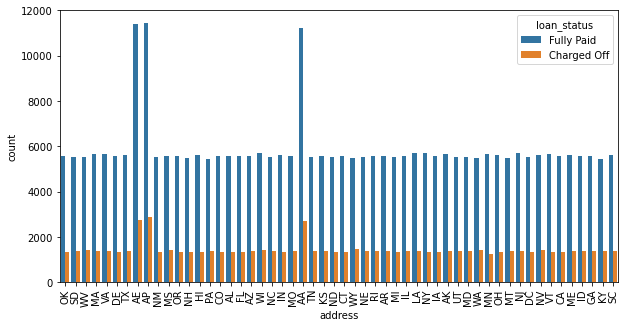

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(df['address'], hue = df['loan_status'])
plt.xticks(rotation = '90')
plt.show()

* As address column doesn't have more impact on target I will drop this column

In [10]:
#Dropping off address column as it doesn't show more impact on output
df.drop('address', axis = 1,inplace=True)

In [11]:
#Dropping off Emp_title and title columns as there is no use
df.drop(['emp_title','title'], axis = 1,inplace=True)

In [12]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

# UNIVARIATE ANALYSIS

In [13]:
cont_features = df.describe().columns
cont_features.tolist()

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

In [14]:
discrete_features=df.describe(exclude=np.number).columns
discrete_features.tolist()

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type']

In [15]:
cont_features = np.delete(cont_features, [-1,-2,-6])
cont_features

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc'],
      dtype='object')

*  Deleting 'pub_rec_bankruptcies', 'mort_acc',  'pub_rec' from cont_features as they appear to be categorical


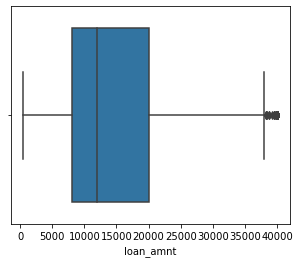

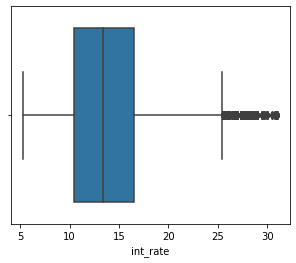

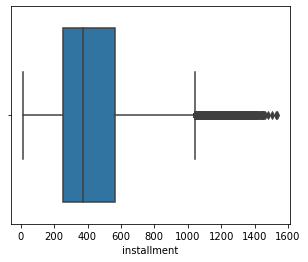

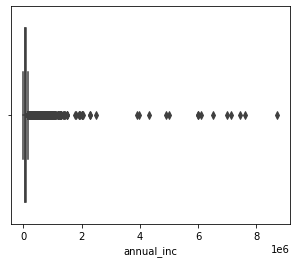

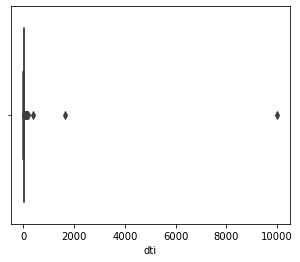

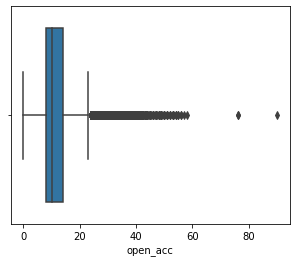

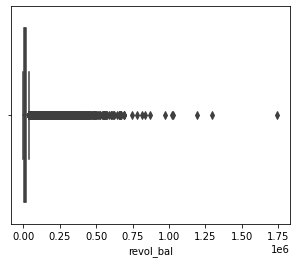

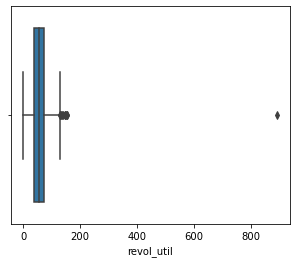

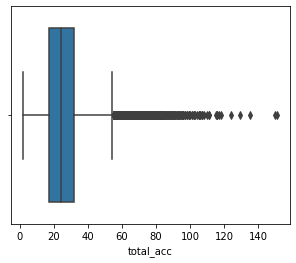

In [16]:
for x in cont_features:
    plt.figure(figsize=(5,4)) 
    sns.boxplot(df[x])
plt.show()

* As there are outliers for each continuous feature I need to remove them.

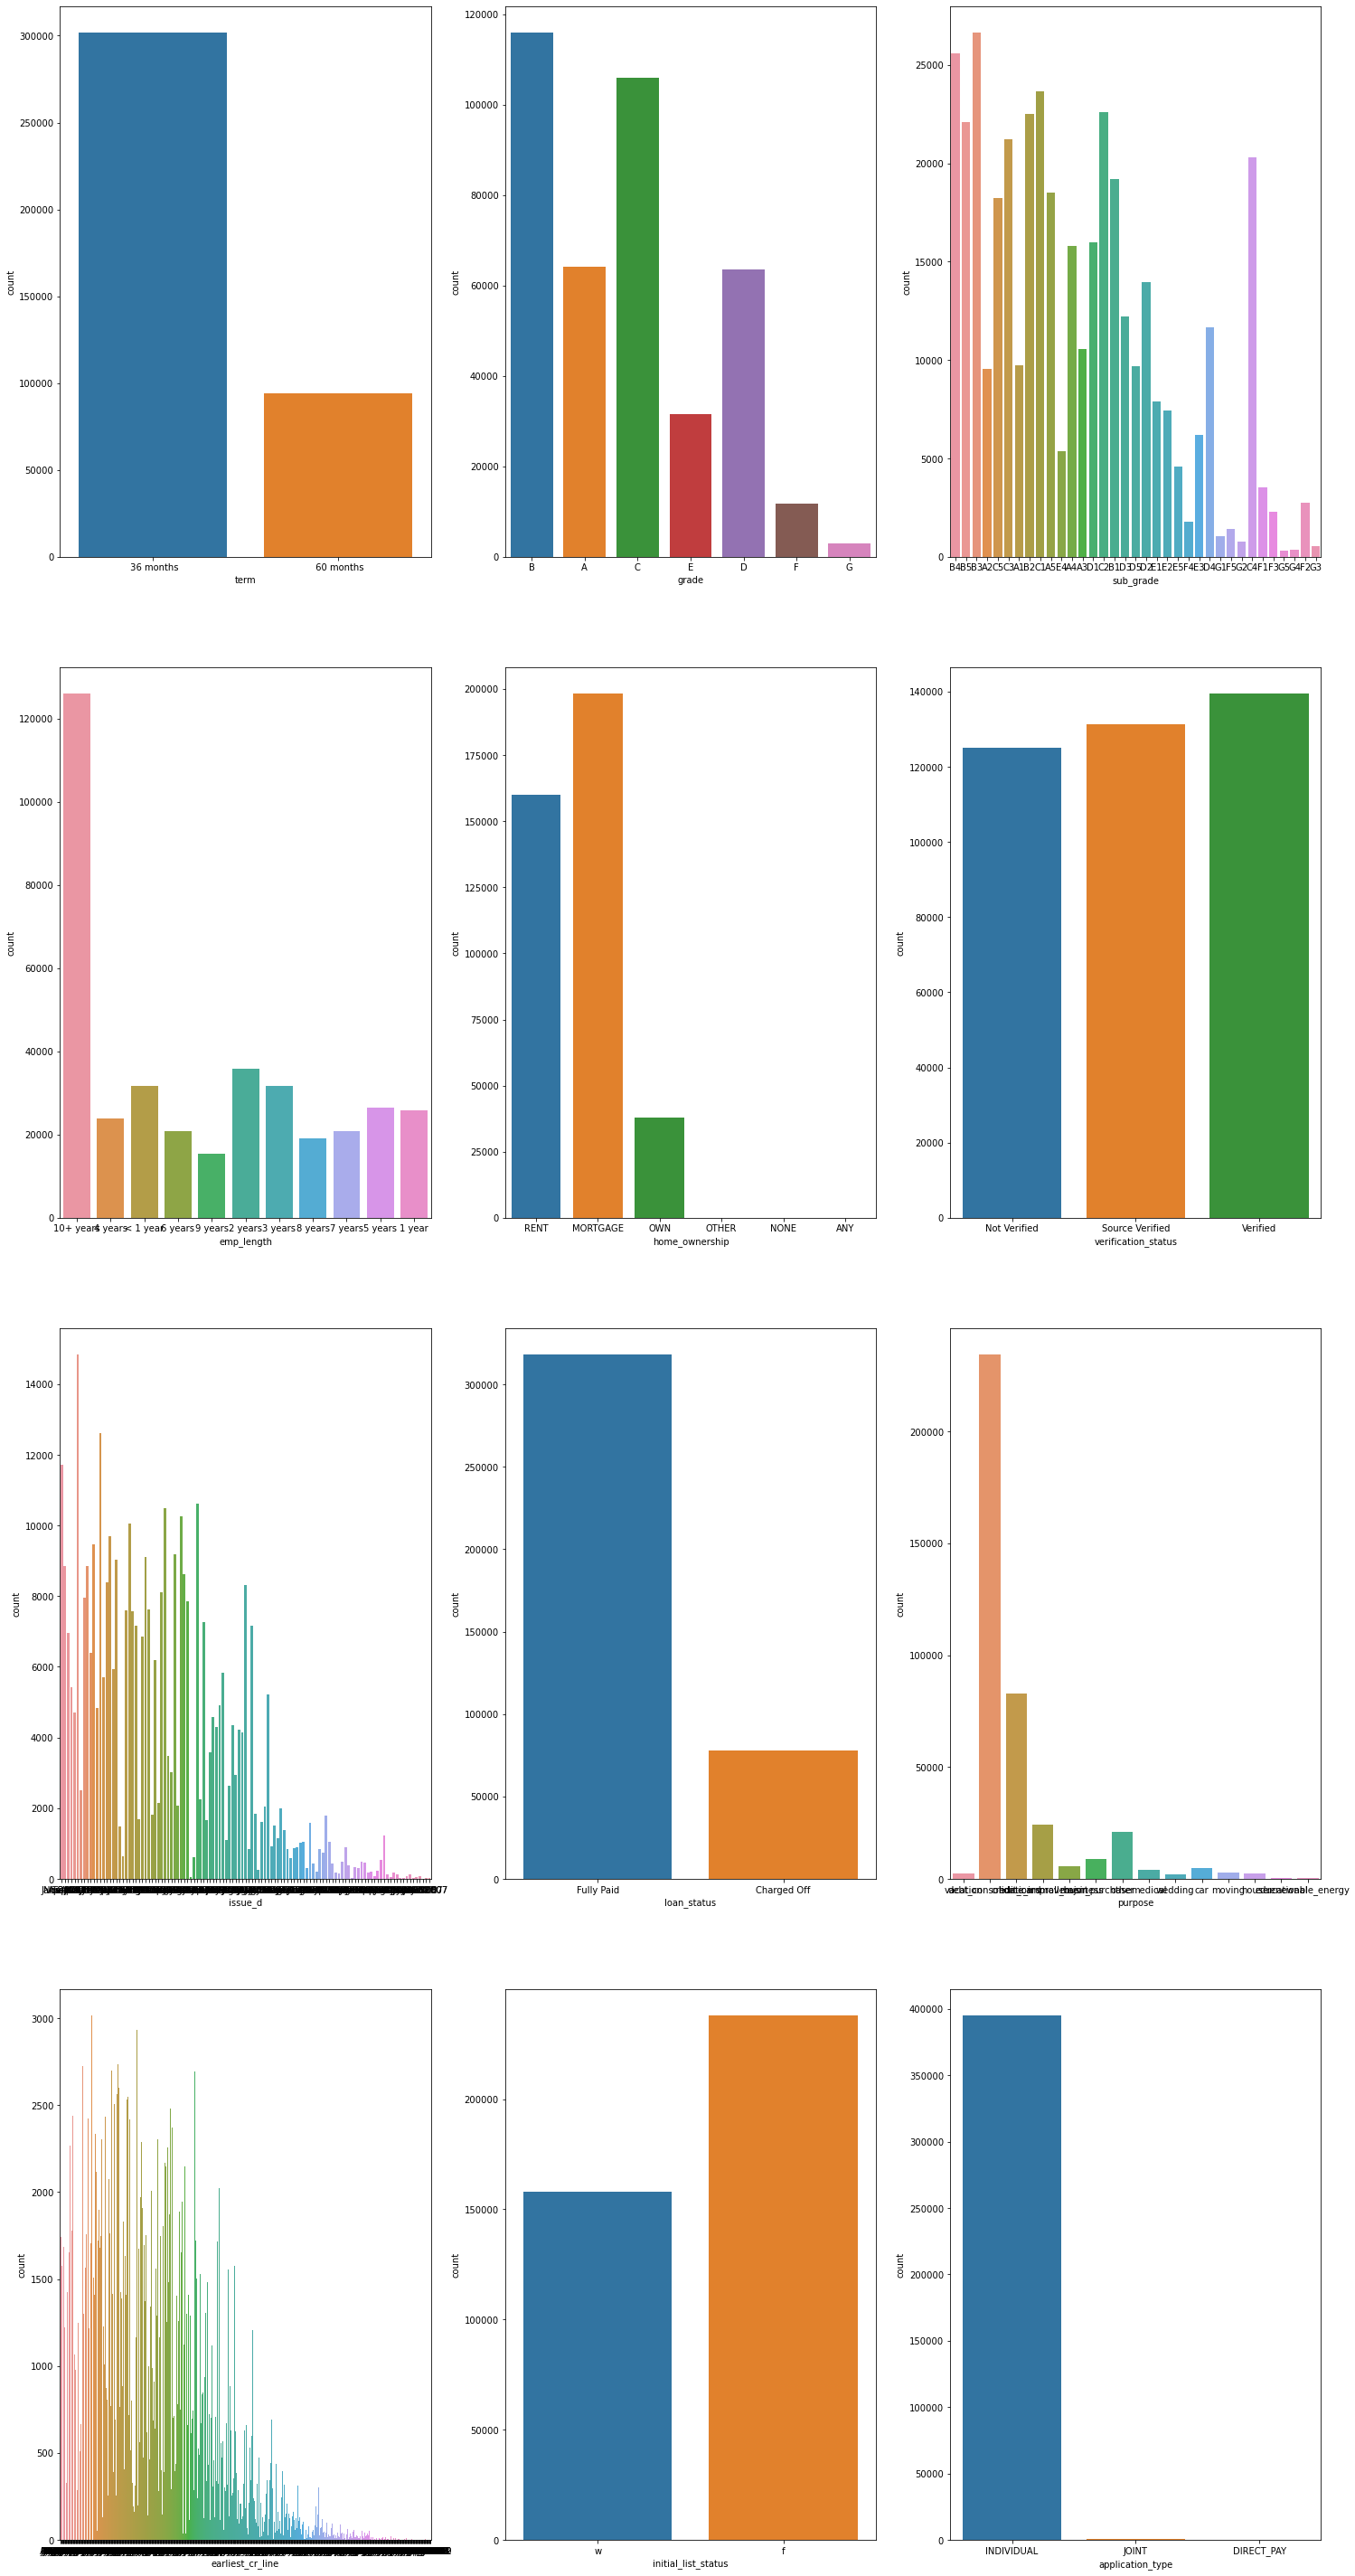

In [17]:
i = 1
plt.figure(figsize=(25,65))
for x in discrete_features:
    plt.subplot(5,3,i)
    sns.countplot(df[x])
    i += 1
plt.show()

* There are more people who took loan for 36 months
* There are more people with Grade B
* There are more people who has Employement_length more than 30 years
* There are more people with Home_ownership Mortguage
* There are more people with Verification_status as verified
* There are more people with loan_status as Fullu_paid
* There are more people with application_type as Individual

In [18]:
df.describe(exclude=np.number).T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507
earliest_cr_line,396030,684,Oct-2000,3017


# ENCODING

In [19]:
#I will do label_encoding for term,grade,home_ownership,verification_status,loan_status,
#initial_list_status,application_type
from sklearn import preprocessing

label_features=np.delete(discrete_features, [2,3,6,8,9])



In [20]:
label_features

Index(['term', 'grade', 'home_ownership', 'verification_status', 'loan_status',
       'initial_list_status', 'application_type'],
      dtype='object')

In [21]:
label_encoder = preprocessing.LabelEncoder()


In [22]:
for i in label_features:
    df[i]= label_encoder.fit_transform(df[i])

In [23]:
for i in label_features:
    print(i,df[i].unique())

term [0 1]
grade [1 0 2 4 3 5 6]
home_ownership [5 1 4 3 2 0]
verification_status [0 1 2]
loan_status [1 0]
initial_list_status [1 0]
application_type [1 2 0]


In [24]:
df.loan_status.value_counts()

1    318357
0     77673
Name: loan_status, dtype: int64

In [25]:
#I will do target_encoding for remaining columns 
import category_encoders as ce

In [26]:
target_features=np.delete(discrete_features, [0,1,4,5,6,7,9,10,11])
target_features

Index(['sub_grade', 'emp_length', 'purpose'], dtype='object')

In [27]:
for fea in target_features:
    df[fea] = ce.TargetEncoder().fit_transform(df[fea],df['loan_status'])
    

In [28]:
for i in target_features:
    print(i,df[i].unique())

sub_grade [0.86160697 0.84496264 0.87664603 0.95181353 0.75493313 0.78158428
 0.97132285 0.891487   0.82630378 0.9150923  0.60697631 0.92976123
 0.94194402 0.73619709 0.80248007 0.901418   0.71578172 0.67989691
 0.71966167 0.65593028 0.6326201  0.59689414 0.54392837 0.61962301
 0.68868491 0.53875236 0.51324266 0.51724138 0.76464497 0.61255656
 0.56386702 0.49683544 0.55080214 0.57519884 0.48913043]
emp_length [0.8158139  0.80761523 0.79312845 0.81080562 0.79952984 0.80673794
 0.80476867 0.80023998 0.805226   0.80781279 0.80086547 0.7247145 ]
purpose [0.81076672 0.79258615 0.83288163 0.82992093 0.70549026 0.83526735
 0.78782157 0.78288847 0.87913907 0.86523313 0.76524177 0.8028169
 0.83657588 0.76595745]


In [29]:
# Encoding date_time features
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['issue_yr'] = df['issue_d'].dt.year
df['issue_mo'] = df['issue_d'].dt.month
df['earliest_cr_line_yr'] = df['earliest_cr_line'].dt.year
df['earliest_cr_line_mo'] = df['earliest_cr_line'].dt.month

df.drop(['issue_d', 'earliest_cr_line'], axis = 1, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int32  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  int32  
 5   sub_grade             396030 non-null  float64
 6   emp_length            396030 non-null  float64
 7   home_ownership        396030 non-null  int32  
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  int32  
 10  loan_status           396030 non-null  int32  
 11  purpose               396030 non-null  float64
 12  dti                   396030 non-null  float64
 13  open_acc              396030 non-null  float64
 14  pub_rec               396030 non-null  float64
 15  

* Now all the columns are either int or float

# Finding Correlation

In [31]:
spearman_corr = df.corr(method='spearman')

In [32]:
spearman_corr

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_yr,issue_mo,earliest_cr_line_yr,earliest_cr_line_mo
loan_amnt,1.000000,0.411597,0.131432,0.968334,0.130762,-0.134468,0.104722,-0.187025,0.488566,0.290383,...,0.104708,0.237115,0.081562,0.017104,0.231240,-0.108661,0.094164,-0.021606,-0.161265,-0.009818
term,0.411597,1.000000,0.413953,0.214613,0.432340,-0.440259,0.059260,-0.099416,0.129950,0.194868,...,0.055800,0.106423,0.104799,0.010506,0.112856,-0.020507,0.087682,0.001802,-0.040660,-0.002131
int_rate,0.131432,0.413953,1.000000,0.137293,0.950582,-0.975466,0.001796,0.081871,-0.096648,0.231215,...,0.303990,-0.050880,-0.060372,-0.014489,-0.102962,0.060848,0.006359,-0.004258,0.110807,-0.002429
installment,0.968334,0.214613,0.137293,1.000000,0.125653,-0.129271,0.095977,-0.161188,0.470464,0.277984,...,0.131628,0.216667,0.049758,0.012959,0.201861,-0.102922,0.074885,-0.025770,-0.145568,-0.010169
grade,0.130762,0.432340,0.950582,0.125653,1.000000,-0.973963,-0.003167,0.079009,-0.085163,0.212661,...,0.272694,-0.043317,-0.016409,-0.010974,-0.094744,0.068258,0.114553,-0.008717,0.120506,-0.001577
sub_grade,-0.134468,-0.440259,-0.975466,-0.129271,-0.973963,1.000000,0.003593,-0.082454,0.087768,-0.222156,...,-0.282711,0.044842,0.011511,0.011213,0.098082,-0.070892,-0.117007,0.010577,-0.124203,0.001386
emp_length,0.104722,0.059260,0.001796,0.095977,-0.003167,0.003593,1.000000,-0.148275,0.166648,-0.011998,...,0.035359,0.109211,0.016436,0.001113,0.169042,0.004406,0.009108,-0.001362,-0.153132,-0.014623
home_ownership,-0.187025,-0.099416,0.081871,-0.161188,0.079009,-0.082454,-0.148275,1.000000,-0.271620,-0.059792,...,-0.004027,-0.243180,-0.040633,-0.015210,-0.607950,0.005836,-0.034293,-0.003153,0.215849,0.012691
annual_inc,0.488566,0.129950,-0.096648,0.470464,-0.085163,0.087768,0.166648,-0.271620,1.000000,0.107390,...,0.060172,0.334453,0.069469,0.001106,0.378772,-0.071770,0.079153,-0.009262,-0.242316,-0.014224
verification_status,0.290383,0.194868,0.231215,0.277984,0.212661,-0.222156,-0.011998,-0.059792,0.107390,1.000000,...,0.074220,0.091486,-0.018329,-0.003224,0.090782,0.028043,0.001587,0.011020,-0.089965,-0.009372


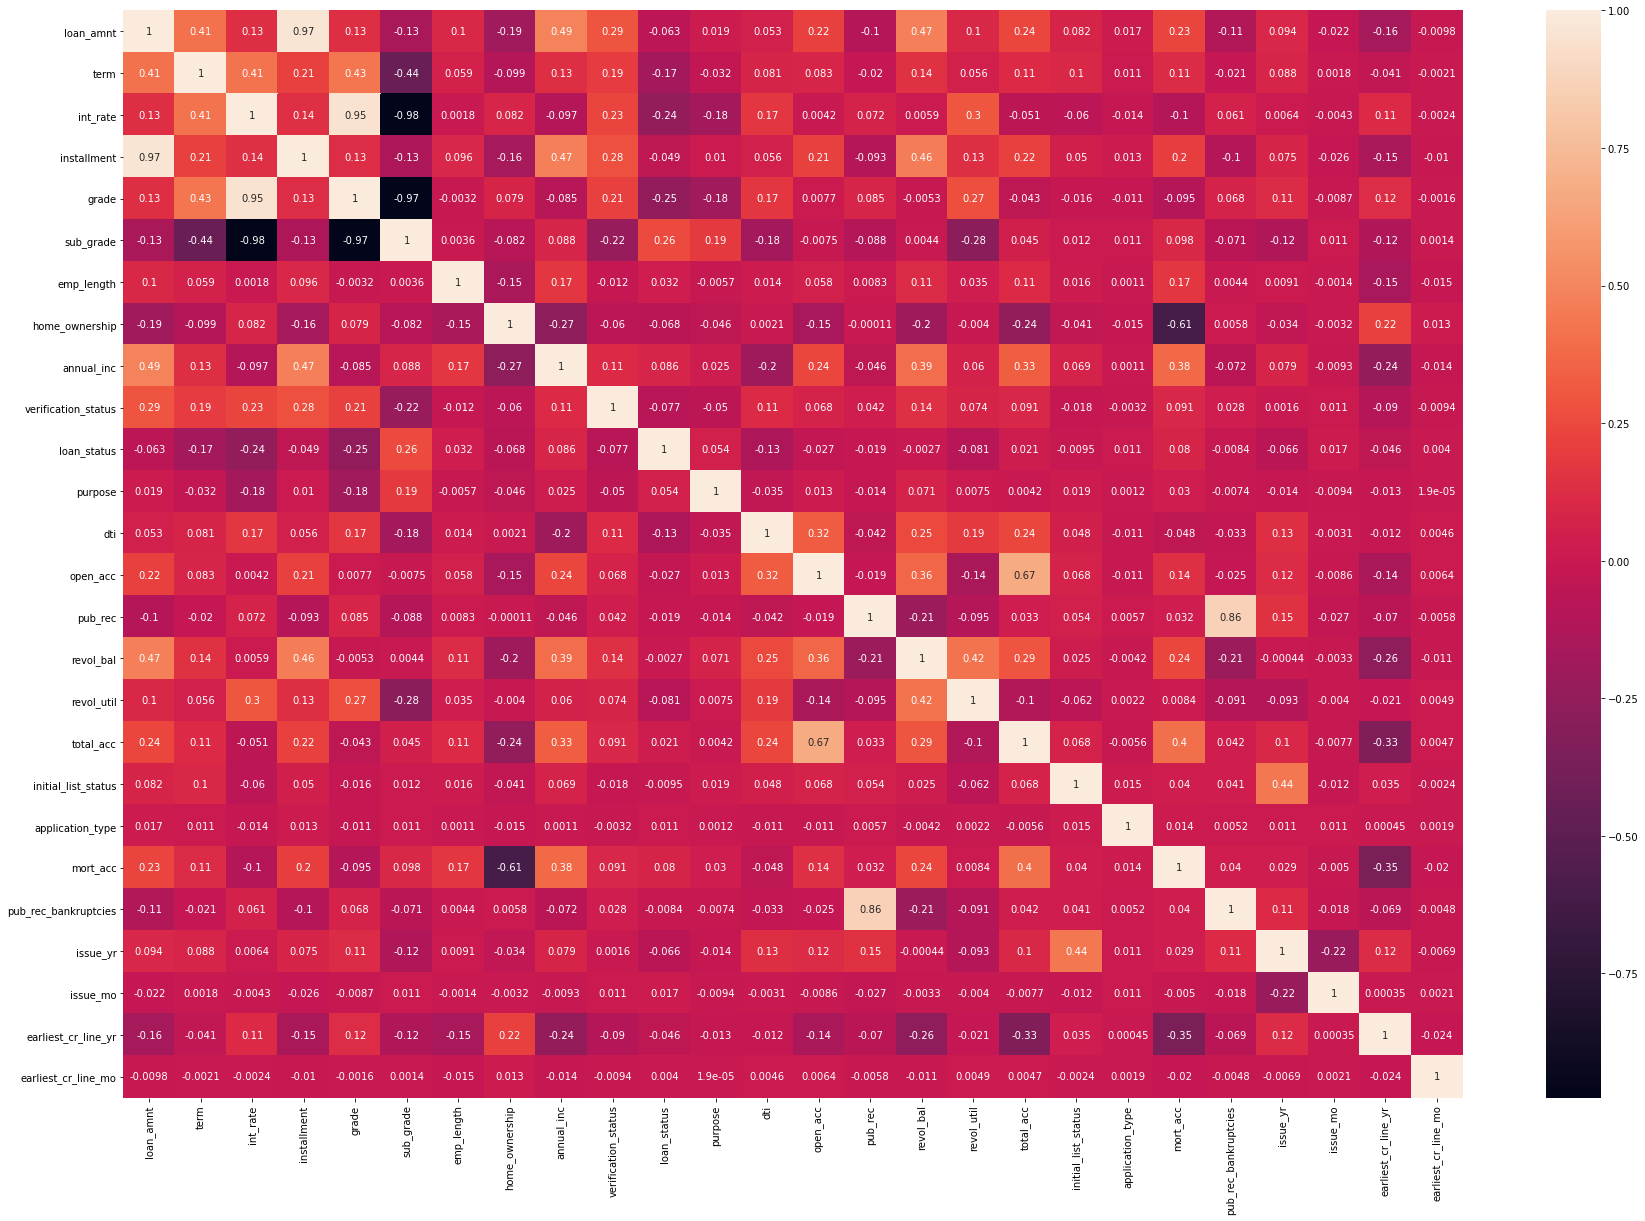

In [33]:
plt.figure(figsize=(30,20))
sns.heatmap(spearman_corr,annot=True)
plt.show()

* Int_rate is highly correlated with Grade and subgrade
* Subgrade is highly correlated with Int_rate and Grade
* Mort_acc is highly negatuvely correlated with home_ownership
* pub_rec_bankruptcies is postively correlated with pub_rec
* total_acc is highly correlated with open_acc
* loan_amt is highly correalted with installment


In [34]:
df.drop(['sub_grade','grade','mort_acc','grade','open_acc','pub_rec','loan_amnt'],axis=1, inplace=True)


In [35]:
spearman_corr1 = df.corr(method='spearman')

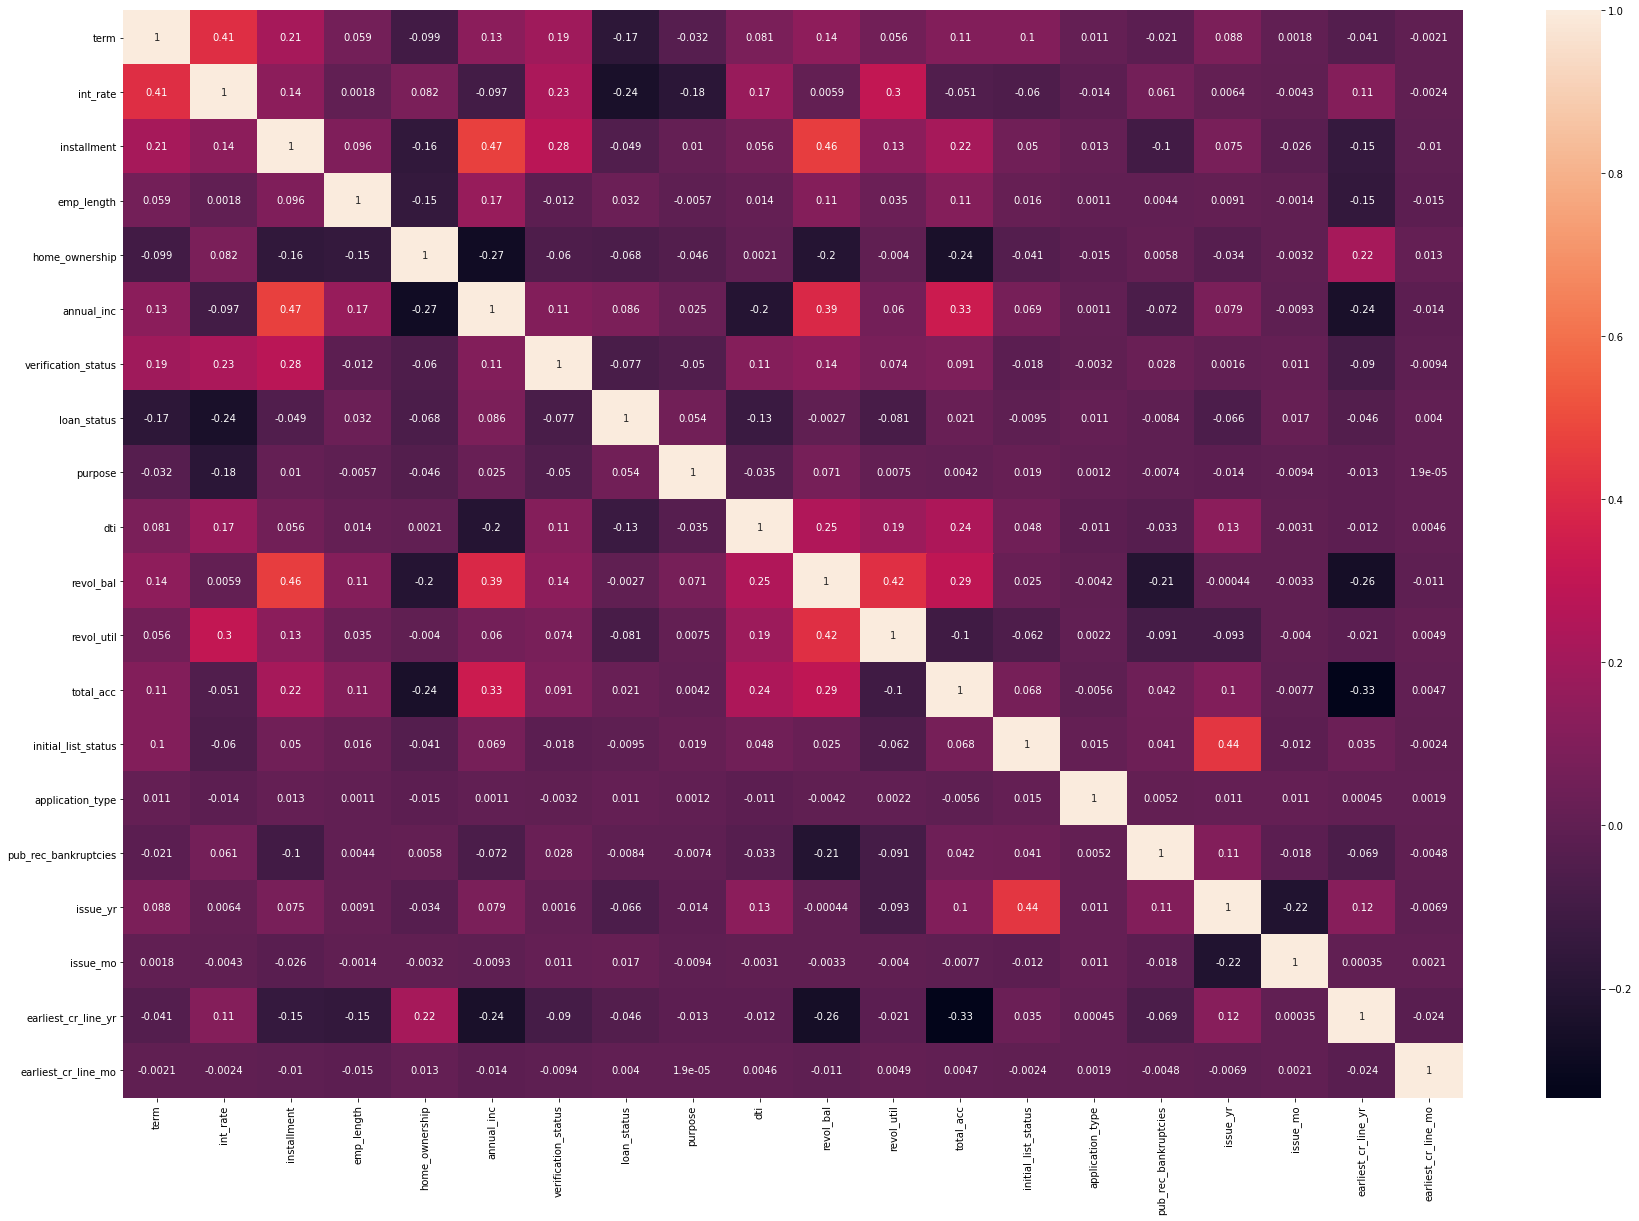

In [36]:
plt.figure(figsize=(30,20))
sns.heatmap(spearman_corr1,annot=True)
plt.show()

In [37]:
(df.isnull().sum()/df.shape[0])*100

term                    0.000000
int_rate                0.000000
installment             0.000000
emp_length              0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
pub_rec_bankruptcies    0.135091
issue_yr                0.000000
issue_mo                0.000000
earliest_cr_line_yr     0.000000
earliest_cr_line_mo     0.000000
dtype: float64

* pub_rec_bankruptcies and revol_util has very less null values. So dropping off null values

In [38]:
df.dropna(subset=['revol_util','pub_rec_bankruptcies'], inplace = True)

In [39]:
(df.isnull().sum()/df.shape[0])*100

term                    0.0
int_rate                0.0
installment             0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
pub_rec_bankruptcies    0.0
issue_yr                0.0
issue_mo                0.0
earliest_cr_line_yr     0.0
earliest_cr_line_mo     0.0
dtype: float64

# Train-Test split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, train_size=0.8, random_state=42)

In [42]:
x_train = train_df.drop('loan_status', axis = 1)
y_train = train_df['loan_status']
x_test = test_df.drop('loan_status', axis = 1)
y_test = test_df['loan_status']

# Outlier Treatment

In [43]:
cont_features

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc'],
      dtype='object')

In [44]:
df.columns

Index(['term', 'int_rate', 'installment', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'pub_rec_bankruptcies', 'issue_yr', 'issue_mo',
       'earliest_cr_line_yr', 'earliest_cr_line_mo'],
      dtype='object')

In [45]:
def IQR(col):
    Q3 = np.percentile(col, 75)
    Q1 = np.percentile(col, 25)
    iqr = Q3-Q1
    upper_lmt = Q3+1.5*iqr
    lower_lmt = Q1-1.5*iqr
    return lower_lmt, upper_lmt

In [46]:
# Defining x and y variables
x_train = train_df.drop('loan_status', axis = 1)
y_train = train_df['loan_status']
x_test = test_df.drop('loan_status', axis = 1)
y_test = test_df['loan_status']

In [47]:
for j in x_train.columns:
    train_df = train_df[(train_df[j]>=IQR(train_df[j])[0])&(train_df[j]<=IQR(train_df[j])[1])]
    


# Model Training

In [48]:
train_df.loan_status.value_counts()

1    134142
0     24260
Name: loan_status, dtype: int64

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression


In [50]:
from sklearn.metrics import precision_score, PrecisionRecallDisplay, RocCurveDisplay, recall_score, ConfusionMatrixDisplay

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns = x_train.columns)

In [70]:
# Hyperparameter C(1/λ) is decided based on the best score on validation data.
train_scores=[]
test_scores=[]
for lmda in np.arange(1, 50, 1):
    log_reg=LogisticRegression(penalty='l2',  C=1/lmda, class_weight={1:1, 0:(191038/46580)})
    log_reg.fit(x_train, y_train) #Training model
    train_pred = log_reg.predict(x_train)
    train_scores.append(precision_score(y_train, train_pred))
    test_pred = log_reg.predict(x_test)
    test_scores.append(precision_score(y_test, test_pred))

    

In [71]:
np.argmax(test_scores)+1, max(test_scores)

(46, 0.8815749599549764)

* Bu using 46 as Lamda value I got good score. I will train model using 46 as lambda value

In [73]:
log_reg=LogisticRegression(penalty='l2',  C=1/46, class_weight={1:1, 0:(191038/46580)})
log_reg.fit(x_train, y_train) #Training model
train_pred = log_reg.predict(x_train)
train_score=precision_score(y_train, train_pred)
test_pred = log_reg.predict(x_test)
test_score=precision_score(y_test, test_pred)

In [74]:
train_score

0.8822442430809659

In [75]:
test_score

0.8815749599549764

In [76]:
log_reg.coef_

array([[-0.22565689, -0.45921568, -0.06230027,  0.1131307 , -0.14154658,
         0.13424052, -0.00830696,  0.059229  , -0.52167372,  0.04950751,
        -0.07355336,  0.05554076,  0.01298991,  0.01897339, -0.00313802,
        -0.10267667,  0.02244603, -0.01533578,  0.01155545]])

In [82]:
weights_x_train = pd.DataFrame(data = {'features' : x_train.columns, 'weights' : log_reg.coef_[0]})
weights_x_train.sort_values(by='weights')
# We have so many columns with negligible weightage. emp_title has an insa

,features,weights
8,dti,-0.521674
1,int_rate,-0.459216
0,term,-0.225657
4,home_ownership,-0.141547
15,issue_yr,-0.102677
10,revol_util,-0.073553
2,installment,-0.062300
17,earliest_cr_line_yr,-0.015336
6,verification_status,-0.008307
14,pub_rec_bankruptcies,-0.003138


In [83]:
import sklearn.metrics as metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  test_pred)

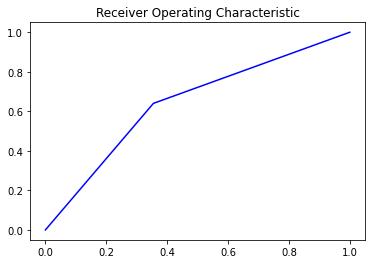

In [84]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' )

In [85]:
y_test.shape, test_pred.shape

((79044,), (79044,))

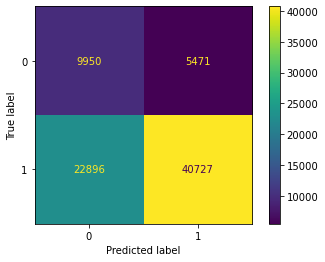

In [86]:
cm = metrics.confusion_matrix(y_test, test_pred,labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
# As I got good score with lambda=46 I will use this model 